## Plot weekly trends (new deaths) for the top 3 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
#I have selected the Albama state for analysis
selected_state = "AL"
selected_county_1 = "Jefferson County "
selected_county_2 = "Mobile County "
selected_county_3 = "Madison County "
#Readind the deaths data
deaths = pd.read_csv("../data/covid_deaths_usafacts.csv")
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-01-07,2023-01-08,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-14,2023-01-15,2023-01-16
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,230,230,230,230,230,230,230,230,230,230
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,719,719,719,719,719,721,721,721,721,721
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,108


In [3]:
# using the melt function so that we get the all the dates in one column and merging will be easy with enrichment data.
deaths_transpose = pd.melt(frame= deaths, id_vars=('countyFIPS','County Name','State','StateFIPS'), var_name=["Date"], value_name='Number of Deaths')
deaths_transpose = deaths_transpose[deaths_transpose['countyFIPS'] != 0]
deaths_transpose.head()

,countyFIPS,County Name,State,StateFIPS,Date,Number of Deaths
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0
5,1009,Blount County,AL,1,2020-01-22,0


In [4]:
deaths_selected_state = deaths_transpose[deaths_transpose["State"] == selected_state]
deaths_selected_state.head()

,countyFIPS,County Name,State,StateFIPS,Date,Number of Deaths
1,1001,Autauga County,AL,1,2020-01-22,0
2,1003,Baldwin County,AL,1,2020-01-22,0
3,1005,Barbour County,AL,1,2020-01-22,0
4,1007,Bibb County,AL,1,2020-01-22,0
5,1009,Blount County,AL,1,2020-01-22,0


In [5]:
deaths_selected_county = deaths_selected_state[deaths_selected_state["County Name"] == selected_county_1]
deaths_selected_county


,countyFIPS,County Name,State,StateFIPS,Date,Number of Deaths
37,1073,Jefferson County,AL,1,2020-01-22,0
3230,1073,Jefferson County,AL,1,2020-01-23,0
6423,1073,Jefferson County,AL,1,2020-01-24,0
9616,1073,Jefferson County,AL,1,2020-01-25,0
12809,1073,Jefferson County,AL,1,2020-01-26,0
...,...,...,...,...,...,...
3467635,1073,Jefferson County,AL,1,2023-01-12,2495
3470828,1073,Jefferson County,AL,1,2023-01-13,2495
3474021,1073,Jefferson County,AL,1,2023-01-14,2495
3477214,1073,Jefferson County,AL,1,2023-01-15,2495


In [6]:
#For the selected state Albama summing the deaths per day of all the counties.
deaths_selected_county_daily = deaths_selected_county.groupby('Date')['Number of Deaths'].sum()
deaths_selected_county_daily

Date
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2023-01-12    2495
2023-01-13    2495
2023-01-14    2495
2023-01-15    2495
2023-01-16    2495
Name: Number of Deaths, Length: 1091, dtype: int64

In [7]:
#Finding out the new cases per day.
new_deaths_selected_county_daily = deaths_selected_county_daily.diff().reset_index()
new_deaths_selected_county_daily

,Date,Number of Deaths
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
...,...,...
1086,2023-01-12,4.0
1087,2023-01-13,0.0
1088,2023-01-14,0.0
1089,2023-01-15,0.0


In [8]:
#Converting the daily to weekly analysis and finding  weekly.
weekly_deaths_selected_county = new_deaths_selected_county_daily
weekly_deaths_selected_county['Date'] = pd.to_datetime(weekly_deaths_selected_county['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_selected_county = weekly_deaths_selected_county.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].sum()
weekly_deaths_selected_county = weekly_deaths_selected_county.reset_index()
weekly_deaths_selected_county.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [9]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_selected_county_given_range = weekly_deaths_selected_county[(weekly_deaths_selected_county["Date"] >= '2022-05-29') & (weekly_deaths_selected_county["Date"] <= '2023-01-02')]
weekly_deaths_selected_county_given_range = weekly_deaths_selected_county_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_selected_county_given_range['Date'] = weekly_deaths_selected_county_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_selected_county_given_range

,Date,Number of Deaths
0,2022-05-30,3.0
1,2022-06-06,6.0
2,2022-06-13,0.0
3,2022-06-20,0.0
4,2022-06-27,7.0
5,2022-07-04,0.0
6,2022-07-11,3.0
7,2022-07-18,3.0
8,2022-07-25,0.0
9,2022-08-01,6.0


<AxesSubplot: title={'center': 'Deaths of Jefferson County in Albama State'}, xlabel='Date'>

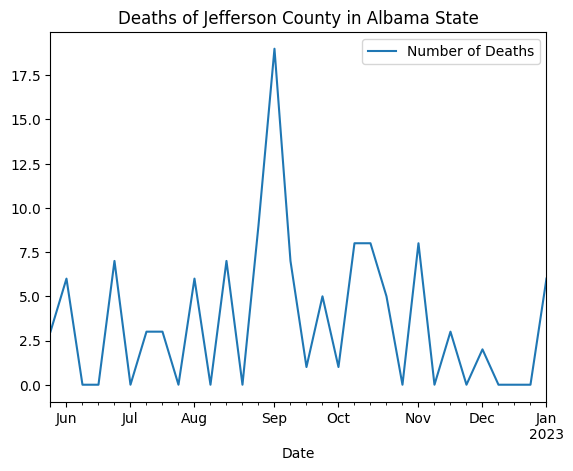

In [10]:
weekly_deaths_selected_county_given_range.plot(x='Date', y='Number of Deaths', title = 'Deaths of Jefferson County in Albama State')

### Week ending with 2022-09-05 has peak of deaths in jefferson county with value 19. As september 5th 2022 was a labour day and maybe people have gathered as it was long weeekend.

In [11]:
weekly_deaths_selected_county_given_range_max_normalised = weekly_deaths_selected_county_given_range.copy()
for column in weekly_deaths_selected_county_given_range_max_normalised.columns:
    weekly_deaths_selected_county_given_range_max_normalised['Number of Deaths'] = np.log(weekly_deaths_selected_county_given_range_max_normalised['Number of Deaths'] + 1 ) / np.log(weekly_deaths_selected_county_given_range_max_normalised['Number of Deaths'].max() + 1)
display(weekly_deaths_selected_county_given_range_max_normalised)

,Date,Number of Deaths
0,2022-05-30,0.548690
1,2022-06-06,0.722082
2,2022-06-13,0.000000
3,2022-06-20,0.000000
4,2022-06-27,0.760549
5,2022-07-04,0.000000
6,2022-07-11,0.548690
7,2022-07-18,0.548690
8,2022-07-25,0.000000
9,2022-08-01,0.722082


<AxesSubplot: title={'center': 'Log Normalized Plot of Deaths of Jefferson County in Albama State'}, xlabel='Date'>

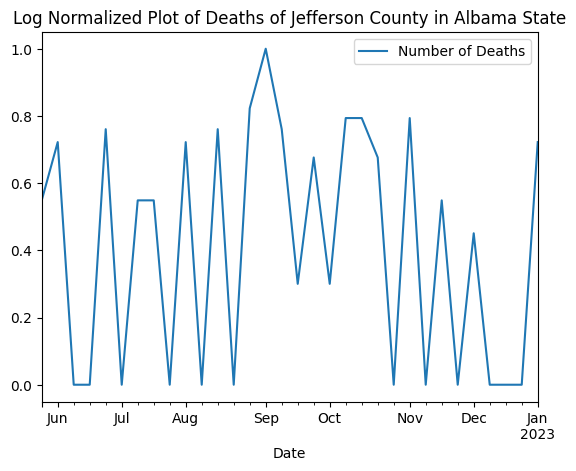

In [12]:
weekly_deaths_selected_county_given_range_max_normalised.plot(x='Date', y='Number of Deaths', title = 'Log Normalized Plot of Deaths of Jefferson County in Albama State')

In [13]:
deaths_selected_county_2 = deaths_selected_state[deaths_selected_state["County Name"] == selected_county_2]
deaths_selected_county_2

,countyFIPS,County Name,State,StateFIPS,Date,Number of Deaths
49,1097,Mobile County,AL,1,2020-01-22,0
3242,1097,Mobile County,AL,1,2020-01-23,0
6435,1097,Mobile County,AL,1,2020-01-24,0
9628,1097,Mobile County,AL,1,2020-01-25,0
12821,1097,Mobile County,AL,1,2020-01-26,0
...,...,...,...,...,...,...
3467647,1097,Mobile County,AL,1,2023-01-12,1765
3470840,1097,Mobile County,AL,1,2023-01-13,1765
3474033,1097,Mobile County,AL,1,2023-01-14,1765
3477226,1097,Mobile County,AL,1,2023-01-15,1765


In [14]:
#For the selected state Albama summing the deaths per day of all the counties.
deaths_selected_county_daily_2 = deaths_selected_county_2.groupby('Date')['Number of Deaths'].sum()
deaths_selected_county_daily_2

Date
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2023-01-12    1765
2023-01-13    1765
2023-01-14    1765
2023-01-15    1765
2023-01-16    1765
Name: Number of Deaths, Length: 1091, dtype: int64

In [15]:
#Finding out the new cases per day.
new_deaths_selected_county_daily_2 = deaths_selected_county_daily_2.diff().reset_index()
new_deaths_selected_county_daily_2

,Date,Number of Deaths
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
...,...,...
1086,2023-01-12,2.0
1087,2023-01-13,0.0
1088,2023-01-14,0.0
1089,2023-01-15,0.0


In [16]:
#Converting the daily to weekly analysis and finding  weekly.
weekly_deaths_selected_county_2 = new_deaths_selected_county_daily_2
weekly_deaths_selected_county_2['Date'] = pd.to_datetime(weekly_deaths_selected_county_2['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_selected_county_2 = weekly_deaths_selected_county_2.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].sum()
weekly_deaths_selected_county_2 = weekly_deaths_selected_county_2.reset_index()
weekly_deaths_selected_county_2.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [17]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_selected_county_given_range_2 = weekly_deaths_selected_county_2[(weekly_deaths_selected_county_2["Date"] >= '2022-05-29') & (weekly_deaths_selected_county_2["Date"] <= '2023-01-02')]
weekly_deaths_selected_county_given_range_2 = weekly_deaths_selected_county_given_range_2.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_selected_county_given_range_2['Date'] = weekly_deaths_selected_county_given_range_2['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_selected_county_given_range_2

,Date,Number of Deaths
0,2022-05-30,1.0
1,2022-06-06,2.0
2,2022-06-13,2.0
3,2022-06-20,1.0
4,2022-06-27,4.0
5,2022-07-04,5.0
6,2022-07-11,2.0
7,2022-07-18,2.0
8,2022-07-25,7.0
9,2022-08-01,5.0


<AxesSubplot: title={'center': 'Deaths of Mobile County in Albama State'}, xlabel='Date'>

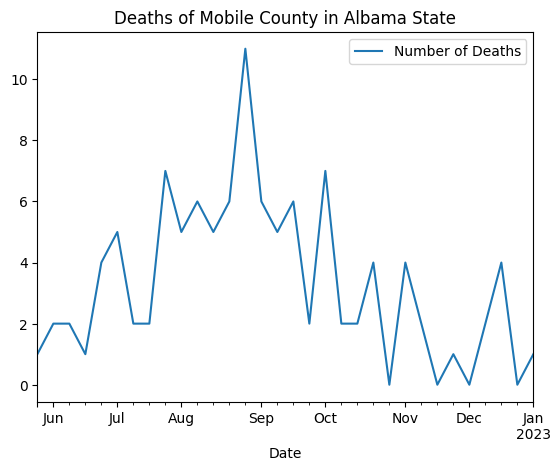

In [18]:
weekly_deaths_selected_county_given_range_2.plot(x='Date', y='Number of Deaths', title = 'Deaths of Mobile County in Albama State')

### Week ending with 2022-08-29	has peak of deaths in mobile county with value 11. As september 5th 2022 was a labour day and maybe people have gathered as it was long weeekend.

In [19]:
weekly_deaths_selected_county_given_range_2_max_normalised = weekly_deaths_selected_county_given_range_2.copy()
for column in weekly_deaths_selected_county_given_range_2_max_normalised.columns:
    weekly_deaths_selected_county_given_range_2_max_normalised['Number of Deaths'] = np.log(weekly_deaths_selected_county_given_range_2_max_normalised['Number of Deaths'] + 1 ) / np.log(weekly_deaths_selected_county_given_range_2_max_normalised['Number of Deaths'].max() + 1)
display(weekly_deaths_selected_county_given_range_2_max_normalised)

,Date,Number of Deaths
0,2022-05-30,0.354952
1,2022-06-06,0.528185
2,2022-06-13,0.528185
3,2022-06-20,0.354952
4,2022-06-27,0.720441
5,2022-07-04,0.783295
6,2022-07-11,0.528185
7,2022-07-18,0.528185
8,2022-07-25,0.877217
9,2022-08-01,0.783295


<AxesSubplot: title={'center': 'Log Normalized Plot of Deaths of Mobile County in Albama State'}, xlabel='Date'>

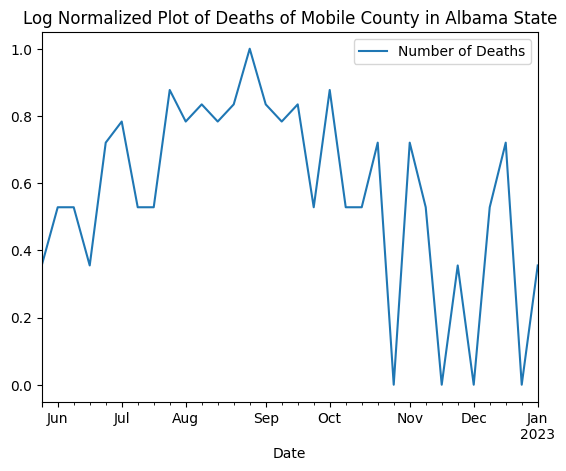

In [20]:
weekly_deaths_selected_county_given_range_2_max_normalised.plot(x='Date', y='Number of Deaths', title = 'Log Normalized Plot of Deaths of Mobile County in Albama State')

In [21]:
deaths_selected_county_3 = deaths_selected_state[deaths_selected_state["County Name"] == selected_county_3]
deaths_selected_county_3

,countyFIPS,County Name,State,StateFIPS,Date,Number of Deaths
45,1089,Madison County,AL,1,2020-01-22,0
3238,1089,Madison County,AL,1,2020-01-23,0
6431,1089,Madison County,AL,1,2020-01-24,0
9624,1089,Madison County,AL,1,2020-01-25,0
12817,1089,Madison County,AL,1,2020-01-26,0
...,...,...,...,...,...,...
3467643,1089,Madison County,AL,1,2023-01-12,1052
3470836,1089,Madison County,AL,1,2023-01-13,1052
3474029,1089,Madison County,AL,1,2023-01-14,1052
3477222,1089,Madison County,AL,1,2023-01-15,1052


In [22]:
#For the selected state Albama summing the deaths per day of all the counties.
deaths_selected_county_daily_3 = deaths_selected_county_3.groupby('Date')['Number of Deaths'].sum()
deaths_selected_county_daily_3

Date
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2023-01-12    1052
2023-01-13    1052
2023-01-14    1052
2023-01-15    1052
2023-01-16    1052
Name: Number of Deaths, Length: 1091, dtype: int64

In [23]:
#Finding out the new cases per day.
new_deaths_selected_county_daily_3 = deaths_selected_county_daily_3.diff().reset_index()
new_deaths_selected_county_daily_3

,Date,Number of Deaths
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
...,...,...
1086,2023-01-12,4.0
1087,2023-01-13,0.0
1088,2023-01-14,0.0
1089,2023-01-15,0.0


In [24]:
#Converting the daily to weekly analysis and finding  weekly.
weekly_deaths_selected_county_3 = new_deaths_selected_county_daily_3
weekly_deaths_selected_county_3['Date'] = pd.to_datetime(weekly_deaths_selected_county_3['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_selected_county_3 = weekly_deaths_selected_county_3.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].sum()
weekly_deaths_selected_county_3 = weekly_deaths_selected_county_3.reset_index()
weekly_deaths_selected_county_3.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [25]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_selected_county_given_range_3 = weekly_deaths_selected_county_3[(weekly_deaths_selected_county_3["Date"] >= '2022-05-29') & (weekly_deaths_selected_county_3["Date"] <= '2023-01-02')]
weekly_deaths_selected_county_given_range_3 = weekly_deaths_selected_county_given_range_3.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_selected_county_given_range_3['Date'] = weekly_deaths_selected_county_given_range_3['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_selected_county_given_range_3

,Date,Number of Deaths
0,2022-05-30,2.0
1,2022-06-06,2.0
2,2022-06-13,0.0
3,2022-06-20,3.0
4,2022-06-27,2.0
5,2022-07-04,2.0
6,2022-07-11,1.0
7,2022-07-18,5.0
8,2022-07-25,0.0
9,2022-08-01,4.0


<AxesSubplot: title={'center': 'Deaths of Madison County in Albama State'}, xlabel='Date'>

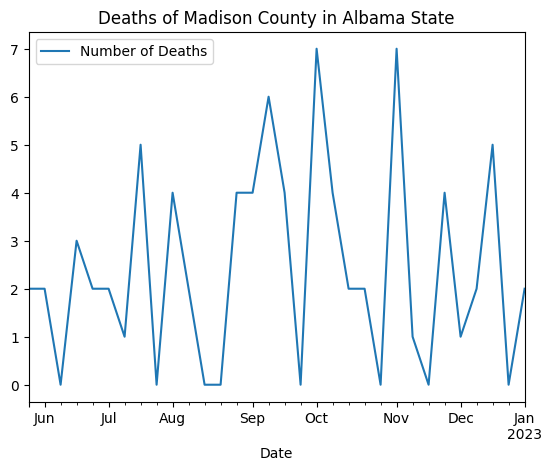

In [26]:
weekly_deaths_selected_county_given_range_3.plot(x='Date', y='Number of Deaths', title = 'Deaths of Madison County in Albama State')

### Week ending with 2022-10-03 and 2022-11-07 has peak value of deaths in madison county with value 7.as september 5th was state holidy may be cases increased there which reukted in deaths after two weeks.

In [27]:
weekly_deaths_selected_county_given_range_3_max_normalised = weekly_deaths_selected_county_given_range_3.copy()
for column in weekly_deaths_selected_county_given_range_3_max_normalised.columns:
    weekly_deaths_selected_county_given_range_3_max_normalised['Number of Deaths'] = np.log(weekly_deaths_selected_county_given_range_3_max_normalised['Number of Deaths'] + 1 ) / np.log(weekly_deaths_selected_county_given_range_3_max_normalised['Number of Deaths'].max() + 1)
display(weekly_deaths_selected_county_given_range_3_max_normalised)

,Date,Number of Deaths
0,2022-05-30,0.611947
1,2022-06-06,0.611947
2,2022-06-13,0.000000
3,2022-06-20,0.736966
4,2022-06-27,0.611947
5,2022-07-04,0.611947
6,2022-07-11,0.415037
7,2022-07-18,0.896585
8,2022-07-25,0.000000
9,2022-08-01,0.826987


<AxesSubplot: title={'center': 'Log Normalized Plot of Deaths of Madison County in Albama State'}, xlabel='Date'>

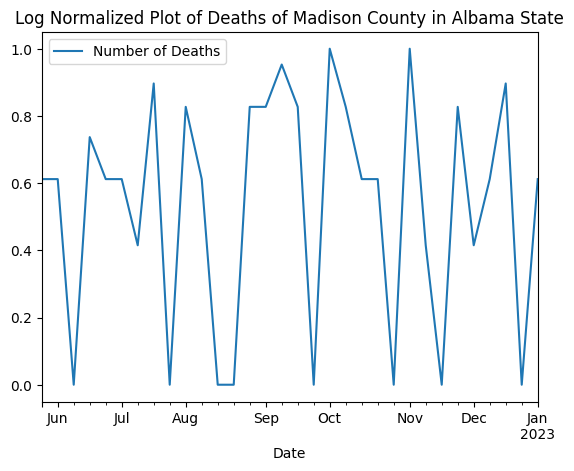

In [28]:
weekly_deaths_selected_county_given_range_3_max_normalised.plot(x='Date', y='Number of Deaths', title = 'Log Normalized Plot of Deaths of Madison County in Albama State')

In [29]:
#For the selected state Albama summing the deaths per day of all the counties.
deaths_selected_state_daily = deaths_selected_state.groupby('Date')['Number of Deaths'].sum()
deaths_selected_state_daily.head()

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
Name: Number of Deaths, dtype: int64

In [30]:
#Finding out the new cases per day.
new_deaths_selected_state_daily = deaths_selected_state_daily.diff().reset_index()
new_deaths_selected_state_daily.head()

,Date,Number of Deaths
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0


In [31]:
#Converting the daily to weekly analysis and finding the mean weekly.
weekly_deaths_sum_selected_state = new_deaths_selected_state_daily.copy()
weekly_deaths_sum_selected_state['Date'] = pd.to_datetime(weekly_deaths_sum_selected_state['Date']) - pd.to_timedelta(7, unit='d')
weekly_deaths_sum_selected_state = weekly_deaths_sum_selected_state.groupby([pd.Grouper(key='Date', freq='W-SUN')])['Number of Deaths'].sum()
weekly_deaths_sum_selected_state = weekly_deaths_sum_selected_state.reset_index()
weekly_deaths_sum_selected_state.head()

,Date,Number of Deaths
0,2020-01-19,0.0
1,2020-01-26,0.0
2,2020-02-02,0.0
3,2020-02-09,0.0
4,2020-02-16,0.0


In [32]:
#considering the given range of dates starting from monday. and weekly analsis from monday to sunday.
weekly_deaths_sum_selected_state_given_range = weekly_deaths_sum_selected_state[(weekly_deaths_sum_selected_state["Date"] >= '2022-05-29') & (weekly_deaths_sum_selected_state["Date"] <= '2023-01-02')]
weekly_deaths_sum_selected_state_given_range = weekly_deaths_sum_selected_state_given_range.sort_values(by=['Date']).reset_index(drop=True)
weekly_deaths_sum_selected_state_given_range['Date'] = weekly_deaths_sum_selected_state_given_range['Date'] + pd.to_timedelta(1, unit='d')
weekly_deaths_sum_selected_state_given_range

,Date,Number of Deaths
0,2022-05-30,13.0
1,2022-06-06,28.0
2,2022-06-13,4.0
3,2022-06-20,33.0
4,2022-06-27,30.0
5,2022-07-04,27.0
6,2022-07-11,36.0
7,2022-07-18,50.0
8,2022-07-25,19.0
9,2022-08-01,83.0


In [33]:
weekly_deaths_selected_state_given_range_max_normalised = weekly_deaths_sum_selected_state_given_range.copy()
for column in weekly_deaths_selected_state_given_range_max_normalised.columns:
    weekly_deaths_selected_state_given_range_max_normalised['Number of Deaths'] = np.log(weekly_deaths_selected_state_given_range_max_normalised['Number of Deaths'] + 1 ) / np.log(weekly_deaths_selected_state_given_range_max_normalised['Number of Deaths'].max() + 1)
display(weekly_deaths_selected_state_given_range_max_normalised)

,Date,Number of Deaths
0,2022-05-30,0.639925
1,2022-06-06,0.775931
2,2022-06-13,0.422717
3,2022-06-20,0.804006
4,2022-06-27,0.787769
5,2022-07-04,0.769664
6,2022-07-11,0.818711
7,2022-07-18,0.873193
8,2022-07-25,0.708141
9,2022-08-01,0.954022


<AxesSubplot: title={'center': 'Log normalized plot of deaths  in Albama State'}, xlabel='Date'>

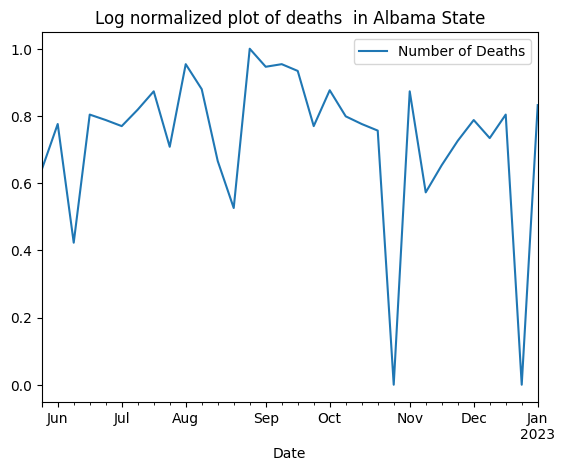

In [34]:
weekly_deaths_selected_state_given_range_max_normalised.plot(x='Date', y='Number of Deaths', title = 'Log normalized plot of deaths  in Albama State')

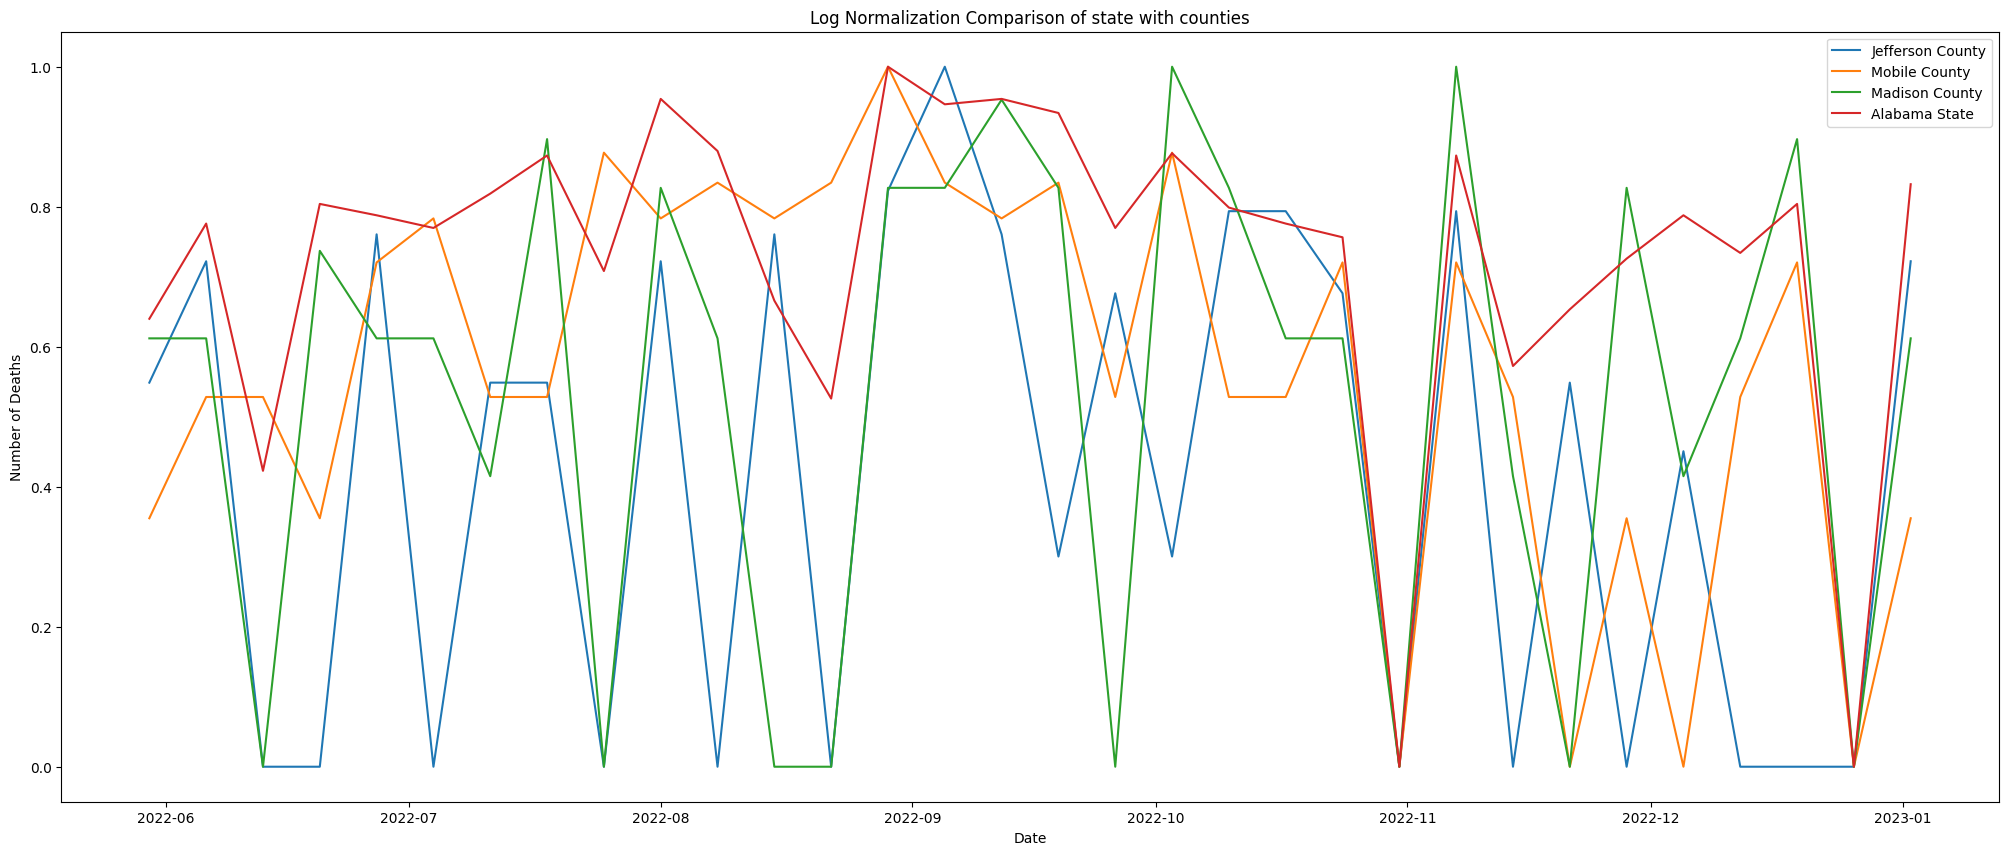

In [50]:
plt.figure(figsize=(25,10))
plt.plot(weekly_deaths_selected_county_given_range_max_normalised['Date'], weekly_deaths_selected_county_given_range_max_normalised['Number of Deaths'], label='Jefferson County')
plt.plot(weekly_deaths_selected_county_given_range_2_max_normalised['Date'], weekly_deaths_selected_county_given_range_2_max_normalised['Number of Deaths'], label='Mobile County')
plt.plot(weekly_deaths_selected_county_given_range_3_max_normalised['Date'], weekly_deaths_selected_county_given_range_3_max_normalised['Number of Deaths'], label='Madison County')
plt.plot(weekly_deaths_selected_state_given_range_max_normalised['Date'], weekly_deaths_selected_state_given_range_max_normalised['Number of Deaths'], label='Alabama State')
plt.title('Log Normalization Comparison of state with counties')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()

plt.show()

### The three counties(Jefferson,Mobile,Madison County) are following state(Alabama State) patterns but not so closely.